**TWITTER SENTIMENT ANALYSIS ON MOVIE REVIEW DATASET**
---

**WHAT IS SENTIMENT ANALYSIS**
----

* It is nothing but opinion mining of text content which recognizes and extracts subjective information in the relevant data.

* It allows us to keep track of what’s being said about your product or service on social media, and can help you detect angry customers or negative mentions before they escalate.

* At the same time, Twitter sentiment analysis can provide valuable insights that drive decisions. What do customers love about your brand? What aspects get the most negative mentions? Moreover, it can also help us to know that which aspects of your business need to be improved and what makes you stand out among your competitors.

* Thus,Sentiment Analysis is a tool which provides a highly accurate analysis of the overall sentiment of the text content which can be widely applied to reviews and social media for a variety of uses, ranging from marketing to customer service.

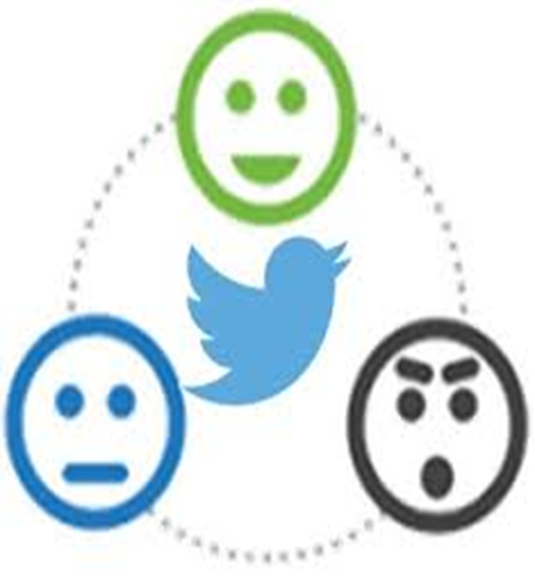

**IMPLEMENTATION**
---

**Importing Essential Libraries**
--

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

**Uploading the Dataset**
--

In [ ]:
path = '/content/output.tsv'
data = pd.read_table(path,header=None,skiprows=1,names=['Sentiment','Review'])

In [ ]:
data

,Sentiment,Review
0,1,this was the first clive cussler i've ever rea...
1,1,i liked the Da Vinci Code a lot.
2,1,i liked the Da Vinci Code a lot.
3,1,I liked the Da Vinci Code but it ultimatly did...
4,1,that's not even an exaggeration ) and at midni...
...,...,...
6912,0,Brokeback Mountain was boring.
6913,0,So Brokeback Mountain was really depressing.
6914,0,"As I sit here, watching the MTV Movie Awards, ..."
6915,0,Ok brokeback mountain is such a horrible movie.


The **head()** returns the first n rows for the object based on position. If your object has the right type of data in it, it is useful for quick testing. This method is used for returning top n (by default value 5) rows of a data frame or series.

In [ ]:
data.head()

,Sentiment,Review
0,1,this was the first clive cussler i've ever rea...
1,1,i liked the Da Vinci Code a lot.
2,1,i liked the Da Vinci Code a lot.
3,1,I liked the Da Vinci Code but it ultimatly did...
4,1,that's not even an exaggeration ) and at midni...


In [ ]:
X = data.Review
y = data.Sentiment

In [ ]:
#Using CountVectorizer to convert text into tokens/features

vect = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 4)

**Splitting the Dataset**
--

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.2)

In [ ]:
#Using training data to transform text into counts of features for each message

vect.fit(X_train)

X_train_dtm = vect.transform(X_train)

X_test_dtm = vect.transform(X_test)

**Applying different types of Machine Learning Algorithms to predict whether the given input tweet is positive or negative.**
--

Here we have used Machine Learning Algorithms like -

* Naive Bayes
* Logistic Regression
* SVM
* KNN




**Naive Bayes Model**
--

In [ ]:
NB = MultinomialNB()
NB.fit(X_train_dtm, y_train)
y_pred = NB.predict(X_test_dtm)

print('\nNaive Bayes')
print("------------------------------------------------------------------------")
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print("------------------------------------------------------------------------")
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Naive Bayes
------------------------------------------------------------------------
Accuracy Score: 98.91618497109826%
------------------------------------------------------------------------
Confusion Matrix: 

[[586  12]
 [  3 783]]


**Logistic Regression Model**
--

In [ ]:
LR = LogisticRegression()
LR.fit(X_train_dtm, y_train)
y_pred = LR.predict(X_test_dtm)

print('\nLogistic Regression')
print("------------------------------------------------------------------------")
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print("------------------------------------------------------------------------")
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Logistic Regression
------------------------------------------------------------------------
Accuracy Score: 99.34971098265896%
------------------------------------------------------------------------
Confusion Matrix: 

[[593   5]
 [  4 782]]


**SVM Model**
--

In [ ]:
SVM = LinearSVC()
SVM.fit(X_train_dtm, y_train)
y_pred = SVM.predict(X_test_dtm)

print('\nSupport Vector Machine')
print("------------------------------------------------------------------------")
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print("------------------------------------------------------------------------")
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Support Vector Machine
------------------------------------------------------------------------
Accuracy Score: 99.0606936416185%
------------------------------------------------------------------------
Confusion Matrix: 

[[592   6]
 [  7 779]]


**KNN Model**
--

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train_dtm, y_train)
y_pred = KNN.predict(X_test_dtm)

print('\nK Nearest Neighbors (NN = 3)')
print("------------------------------------------------------------------------")
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print("------------------------------------------------------------------------")
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


K Nearest Neighbors (NN = 3)
------------------------------------------------------------------------
Accuracy Score: 98.69942196531792%
------------------------------------------------------------------------
Confusion Matrix: 

[[589   9]
 [  9 777]]


In [ ]:
#Naive Bayes Analysis

tokens_words = vect.get_feature_names()
print('\nAnalysis')
print('No. of tokens: ',len(tokens_words))
counts = NB.feature_count_
df_table = {'Token':tokens_words,'Negative': counts[0,:],'Positive': counts[1,:]}
tokens = pd.DataFrame(df_table, columns= ['Token','Positive','Negative'])
positives = len(tokens[tokens['Positive']>tokens['Negative']])
print('No. of positive tokens: ',positives)
print('No. of negative tokens: ',len(tokens_words)-positives)


Analysis
No. of tokens:  294
No. of positive tokens:  143
No. of negative tokens:  151


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Check positivity/negativity of specific tokens

token_search = ['awesome']
print('\nSearch Results for token/s:',token_search)
print("------------------------------------------------")
print(tokens.loc[tokens['Token'].isin(token_search)])


Search Results for token/s: ['awesome']
------------------------------------------------
      Token  Positive  Negative
11  awesome     896.0       1.0


In [ ]:
#Analyse False Negatives (Actual: 1; Predicted: 0)(Predicted negative review for a positive review)

print(X_test[ y_pred < y_test ])


3001    yeah i know the two movies are of different ge...
1172     today was so cool and mission impossible rocked.
1185    Think Mission Impossible, think Bond Girls, th...
1162    mission impossible did kick ass and yes jessic...
1122    Mission impossible was pretty cool, though I w...
2998        I did kinda like Brokeback Mountain though...
2992    no, I hope this doesn't end up like Brokeback ...
2991    and i wanna shout out a big fat thank you to e...
2993        gosh i miss telling Brokeback Mountain news!.
Name: Review, dtype: object


In [ ]:
#Analyse False Positives (Actual: 0; Predicted: 1)(Predicted positive review for a negative review)

print(X_test[ y_pred > y_test ])

5032                     And Harry Potter looks stupid:..
5107     I could hate Harry Potter, but love his scent...
4038    i hated the da vinci code, the movie witha pas...
3953    If Jesus is fabricated a la the Da Vinci Code ...
5109    I loathe Harry Potter, Lord of the Rings and a...
5035    I am SOOOOOO sick of people claiming that Harr...
3945    i thought the da vinci code movie was really b...
5038    Wiccans react to possible Harry Potter book ba...
5050    Marcia Gaither, who teaches classes in Wiccani...
Name: Review, dtype: object


**For testing a review we have compared accuracies of all the ML algorithms and considered the model for prediction which gives out the best accuracy score.**

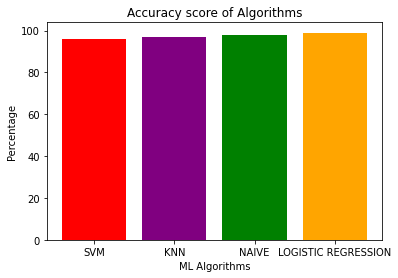

<Figure size 800x800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

x = ['SVM','KNN','NAIVE','LOGISTIC REGRESSION']
h = [96,97,98,99]
c = ['red','purple','green','orange']
plt.bar(x, height = h,color = c)
plt.xlabel("ML Algorithms")
plt.ylabel("Percentage")
plt.title("Accuracy score of Algorithms")
figure(figsize=(10,10), dpi=80)
plt.show()

**Custom Test: Test a review on the best performing model ( Logistic Regression)**
--

In [ ]:
trainingVector = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 5)
trainingVector.fit(X)
X_dtm = trainingVector.transform(X)
LR_complete = LogisticRegression()
LR_complete.fit(X_dtm, y)

LogisticRegression()

#**Input Review**

In [ ]:
print('\nTest a custom review message')
print('Enter review to be analysed: ', end=" ")
test = []
test.append(input())
test_dtm = trainingVector.transform(test)
predLabel = LR_complete.predict(test_dtm)
tags = ['Negative','Positive']



Test a custom review message
Enter review to be analysed:  The movie was awesome


#**Display Output**

In [ ]:
print('The review is predicted',tags[predLabel[0]])

The review is predicted Positive


In [ ]:
#Input Review

print('\nTest a custom review message')
print('Enter review to be analysed: ', end=" ")
test = []
test.append(input())
test_dtm = trainingVector.transform(test)
predLabel = LR_complete.predict(test_dtm)
tags = ['Negative','Positive']



Test a custom review message
Enter review to be analysed:  Worst movie ever


In [ ]:
#Display Output
print('The review is predicted',tags[predLabel[0]])

The review is predicted Negative


**DEEP LEARNING**
-----

**Prediction of movie review sentiment using different types of Deep Learning Algorithms.**

Here we are applying different types of Deep Learning Algorithms like -

* RNN
* GRU
* LSTM
* BILSTM

**RNN ( Recurrent Neural Network )**
----

**Importing Libraries**
--

In [ ]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
import numpy as np


**The review is stored as a sequence of integers. These are word IDs that have been pre-assigned to individual words, and the label is an integer (0 for negative, 1 for positive)**

In [ ]:
# Getting reviews with words that come under 5000
# most occurring words in the entire
# corpus of textual review data
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print(x_train[0])


17464789/17464789 [==============================] - 2s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


**We can use the dictionary returned by imdb.get_word_index() to map the review back to the original words.**

In [ ]:
# Getting all the words from word_index dictionary
word_idx = imdb.get_word_index()

# Originally the index number of a value and not a key,
# hence converting the index as key and the words as values
word_idx = {i: word for word, i in word_idx.items()}

# again printing the review
print([word_idx[i] for i in x_train[0]])


1641221/1641221 [==============================] - 0s 0us/step
['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', '

**Check the range of the reviews we have in this dataset**

In [ ]:
# Get the minimum and the maximum length of reviews
print("Max length of a review:: ", len(max((x_train+x_test), key=len)))
print("Min length of a review:: ", len(min((x_train+x_test), key=len)))


Max length of a review::  2697
Min length of a review::  70


**We see that the longest review available is 2697 words and the shortest one is 70. While working with Neural Networks, it is important to make all the inputs in a fixed size. To achieve this objective we will pad the review sentences.**

In [ ]:
from tensorflow.keras.preprocessing import sequence

# Keeping a fixed length of all reviews to max 400 words
max_words = 400

x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

x_valid, y_valid = x_train[:64], y_train[:64]
x_train_, y_train_ = x_train[64:], y_train[64:]


In [ ]:
# fixing every word's embedding size to be 32
embd_len = 32

# Creating a RNN model
RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(Embedding(vocab_size,
						embd_len,
						input_length=max_words))

# use return_sequences=True
RNN_model.add(SimpleRNN(128,
						activation='tanh',
						return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))

# printing model summary
print(RNN_model.summary())

# Compiling model
RNN_model.compile(
	loss="binary_crossentropy",
	optimizer='adam',
	metrics=['accuracy']
)

# Training the model
history = RNN_model.fit(x_train_, y_train_,
						batch_size=64,
						epochs=5,
						verbose=1,
						validation_data=(x_valid, y_valid))

# Printing model score on test data
print()
print("Simple_RNN Score---> ", RNN_model.evaluate(x_test, y_test, verbose=0))


Model: "Simple_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 32)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               20608     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 180,737
Trainable params: 180,737
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
390/390 [==============================] - 155s 388ms/step - loss: 0.6865 - accuracy: 0.5436 - val_loss: 0.7179 - val_accuracy: 0.4219
Epoch 2/5
390/390 [==============================] - 135s 345ms/step - loss: 0.5960 - accuracy: 0.6761 - val_loss: 0.6718 - val_accuracy: 0.6406
Epoch 3/5
390/390 [

**GRU ( Gated Recurrent Units )**
----

In [ ]:
# Defining GRU model
gru_model = Sequential(name="GRU_Model")
gru_model.add(Embedding(vocab_size,
						embd_len,
						input_length=max_words))
gru_model.add(GRU(128,
				activation='tanh',
				return_sequences=False))
gru_model.add(Dense(1, activation='sigmoid'))

# Printing the Summary
print(gru_model.summary())

# Compiling the model
gru_model.compile(
	loss="binary_crossentropy",
	optimizer='adam',
	metrics=['accuracy']
)

# Training the GRU model
history2 = gru_model.fit(x_train_, y_train_,
						batch_size=64,
						epochs=5,
						verbose=1,
						validation_data=(x_valid, y_valid))

# Printing model score on test data
print()
print("GRU model Score---> ", gru_model.evaluate(x_test, y_test, verbose=0))


Model: "GRU_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           160000    
                                                                 
 gru (GRU)                   (None, 128)               62208     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 222,337
Trainable params: 222,337
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
390/390 [==============================] - 15s 26ms/step - loss: 0.5143 - accuracy: 0.7338 - val_loss: 0.3542 - val_accuracy: 0.8125
Epoch 2/5
390/390 [==============================] - 9s 24ms/step - loss: 0.2969 - accuracy: 0.8786 - val_loss: 0.2459 - val_accuracy: 0.9062
Epoch 3/5
390/390 [======

**BILSTM ( Bi-directional Long Short Term Memory )**
---

In [ ]:
# Defining Bidirectional LSTM model
bi_lstm_model = Sequential(name="Bidirectional_LSTM")
bi_lstm_model.add(Embedding(vocab_size,
							embd_len,
							input_length=max_words))
bi_lstm_model.add(Bidirectional(LSTM(128,
									activation='tanh',
									return_sequences=False)))
bi_lstm_model.add(Dense(1, activation='sigmoid'))

# Printing model summary
print(bi_lstm_model.summary())

# Compiling model summary
bi_lstm_model.compile(
loss="binary_crossentropy",
optimizer='adam',
metrics=['accuracy']
)

# Training the model
history4 = bi_lstm_model.fit(x_train_, y_train_,
							batch_size=64,
							epochs=5,
							verbose=2,
							validation_data=(x_test, y_test))

# Printing model score on test data
print()
print("Bidirectional LSTM model Score---> ",
	bi_lstm_model.evaluate(x_test, y_test, verbose=0))


Model: "Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 400, 32)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              164864    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 325,121
Trainable params: 325,121
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
390/390 - 28s - loss: 0.4946 - accuracy: 0.7519 - val_loss: 0.4199 - val_accuracy: 0.8174 - 28s/epoch - 72ms/step
Epoch 2/5
390/390 - 24s - loss: 0.3273 - accuracy: 0.8679 - val_loss: 0.3366 - val_accuracy: 0.8616 - 24s/epoch

**LSTM ( Long Short Term Memory )**
----

In [ ]:
sentiment_label = data.Sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1]), Int64Index([1, 0], dtype='int64'))

In [ ]:
tweet = data.Review.values

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

vocab_size = 14000
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 32)           448000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 464,651
Trainable params: 464,651
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
173/173 [==============================] - 159s 905ms/step - loss: 0.3686 - accuracy: 0.8379 - val_loss: 2.7175 - val_accuracy: 0.3071
Epoch 2/5
173/173 [==============================] - 159s 918ms/step - loss: 0.0707 - accuracy: 0.9794 - val_loss: 3.8436 - val_accuracy: 0.3035
Epoch 3/5
173/173 [==============================] - 170s 983ms/step - loss: 0.0300 - accuracy: 0.9910 - val_loss: 4.6450 - val_accuracy: 0.3035
Epoch 4/5
173/173 [==============================] - 163s 942ms/step - loss: 0.0165 - accuracy: 0.9960 - val_loss: 4.5259 - val_accuracy: 0.3071
Epoch 5/5
173/173 [==============================] - 156s 901ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 5.0698 - val_accuracy: 0.3035


**ACCURACY COMPARISON OF ALL DEEP LEARNING ALGORITHMS**
---

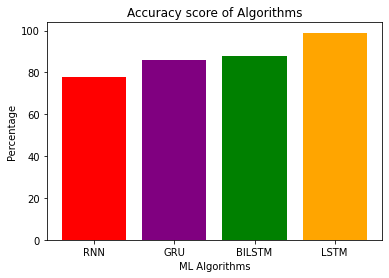

<Figure size 800x800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

x = ['RNN','GRU','BILSTM','LSTM']
h = [78,86,88,99]
c = ['red','purple','green','orange']
plt.bar(x, height = h,color = c)
plt.xlabel("DL Algorithms")
plt.ylabel("Percentage")
plt.title("Accuracy score of Algorithms")
figure(figsize=(10,10), dpi=80)
plt.show()

**Custom Test: Test a review on the best performing model ( LSTM )**
--

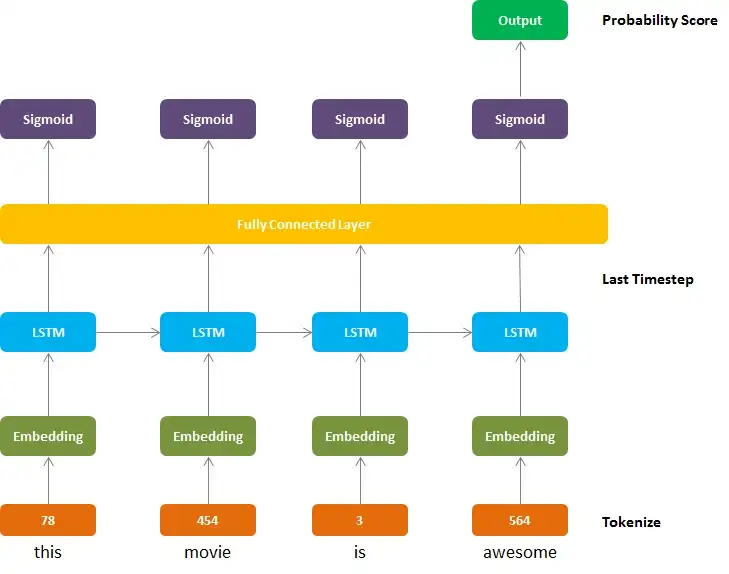

**INPUT TWEET**

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed the film."
predict_sentiment(test_sentence1)


1/1 [==============================] - 0s 74ms/step
Predicted label:  1


In [ ]:
test_sentence3 = "This is the best movie i ever seen in my life!"
predict_sentiment(test_sentence3)

1/1 [==============================] - 0s 74ms/step
Predicted label:  1


In [ ]:
test_sentence4 = "Terrible movie"
predict_sentiment(test_sentence4)

1/1 [==============================] - 0s 78ms/step
Predicted label:  0


In [ ]:
test_sentence4 = "Interesting movie"
predict_sentiment(test_sentence4)

1/1 [==============================] - 0s 63ms/step
Predicted label:  1


In [ ]:
test_sentence4 = "Worst Movie Ever"
predict_sentiment(test_sentence4)

1/1 [==============================] - 0s 70ms/step
Predicted label:  0


In [ ]:
test_sentence4 = "Mind Blowing Movie"
predict_sentiment(test_sentence4)

1/1 [==============================] - 0s 75ms/step
Predicted label:  1


In [ ]:
test_sentence4 = "Fantastic film"
predict_sentiment(test_sentence4)

1/1 [==============================] - 0s 70ms/step
Predicted label:  1


In [ ]:
test_sentence4 = "that movie really sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
predict_sentiment(test_sentence4)

1/1 [==============================] - 0s 73ms/step
Predicted label:  0


In [ ]:
test_sentence4 = "That movie was! really loved it and would great watch it again because it was amazingly great"
predict_sentiment(test_sentence4)

1/1 [==============================] - 0s 67ms/step
Predicted label:  1
